In [2]:
import pandas as pd
import nltk
from konlpy.tag import Okt; okt = Okt()
from collections import Counter


In [3]:
data = pd.read_csv('한국경제 크롤링.csv', encoding = 'cp949')

In [4]:
data.head()

,index,date,title,body,company,url
0,0,2020.01.09.,엔씨만 빼고…눈물의 게임株 올해는 볕들까 | 한경닷컴,\r\n\t\t\t\t\t\t\t\t한때 해외 영토 확장에 따른 성장 스토리가 부각...,한국경제,https://www.hankyung.com/finance/article/20200...
1,1,2020.01.29.,NHN 5 이상 상승 NHN 4Q19 Preview 상쾌하게 시작하는 2020년 ...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...,한국경제,https://www.hankyung.com/finance/article/20200...
2,2,2020.02.10.,날개 단 페이코에 NHN 연매출 1조 돌파…사상 최대 | 한경닷컴,\r\n\r\n\r\n\r\n\r\n\r\n\r\nNHN(69000 1.47%)이 ...,한국경제,https://www.hankyung.com/it/article/202002102552g
3,3,2020.02.24.,신작 게임 흥행 조짐에 네오위즈 질주 | 한경닷컴,\r\n\t\t\t\t\t\t\t\t게임회사 네오위즈(27150 2.45%)가 꾸준...,한국경제,https://www.hankyung.com/finance/article/20200...
4,4,2020.03.04.,NHN 5 이상 상승 춘풍은 그래도 분다 하나금융투자 BUY | 한경닷컴,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...,한국경제,https://www.hankyung.com/finance/article/20200...


In [5]:
text = data.body
text

0     \r\n\t\t\t\t\t\t\t\t한때 해외 영토 확장에 따른 성장 스토리가 부각...
1     \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...
2     \r\n\r\n\r\n\r\n\r\n\r\n\r\nNHN(69000 1.47%)이 ...
3     \r\n\t\t\t\t\t\t\t\t게임회사 네오위즈(27150 2.45%)가 꾸준...
4     \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...
5     \r\n\t\t\t\t\t\t\t\t리서치알음은 23일 네오위즈(27150 2.45...
6     \r\n\r\n\r\n\r\n\r\nNHN 사옥 '플레이뮤지엄'.\r\n\r\n  ...
7     \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 주체별 매매동향 전일 외...
8     \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...
9     \r\n\t\t\t\t\t\t\t\t온라인 고스톱포커 게임에 적용됐던 1일 10만원...
10    \r\n\r\n\r\n\r\n\r\n\r\n\r\n                  ...
11    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 주체별 매매동향 전일 외...
12    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 주체별 매매동향 전일 외...
13    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 주체별 매매동향 전일 외...
14    \r\n\r\n\r\n\r\n\r\nGettyImagesBank\r\n\r\n   ...
15    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...
16    \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 최근 애널리스트 분석의견...
17    \r\n\r\n\r\n\r\n\r\nNHN 사옥사진NHN\r\n\r\n   

In [6]:
#조사, 어미, 구두점, 외국어/기호, url 제거

for i, document in enumerate(text):
    # okt = Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Foreign', 'URL']: 
            clean_words.append(word[0])
    # print(clean_words) 
    document = ' '.join(clean_words)
    # print(document) 
    text[i] = document

print(text[0])

C:\Users\admin\anaconda3\envs\konlp\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


한때 해외 영토 확장 따르다 성장 스토리 부각 받다 주식시장 승승장구 하다 게임 주 들 고전 면 하다 못 있다 업종 대장 주인 엔씨소프트 599000 1.35% 늘다 신작 리니지 2 M 의 흥행 기반 질주 있다 나머지 종목 들 흥행 작 부재 속 주가 힘 잃다 모습 9일 유가 증권 시장 넷마블 125000 2.88% 은 1700원 1.95% 오른 8만 9000원 마감 하다 이 날 상승 하다 넷마블 주가 작년 고 점 비다 35.51% 떨어지다 지난해 선보이다 대규모 신작 BTS 월드 흥행 실패하다 주가 급락 하다 이후 회복하다 못 있다 금융 정보 업체 에프 앤 가이드 따르다 넷마블 지난해 영업 이익 컨센서스 증권사 추 정치 평균 늘다 전 년 대비 5.5% 감소 2283억원 작년 상반기 해도 게임 업종 대 장주 자리 두다 다투다 엔씨소프트 시가총액 차이다 9일 기준 5조 7167억원 벌어지다 주가 부진 엔씨소프트 제외 게임 주 들 공통 적 현상 시가총액 1조원 넘다 게임 제작사 펄 어비스 83100 2.72% 컴투스 102000 2.10% NHN 69000 1.47% 은 주가 작년 고 점 비다 각각 19.37% 20.85% 25.59% 떨어지다 윤을정 신 영 증권 연구원 게임 산업 트렌드 제 작 기간 오래 걸리다 다중접속 역할 게임 MMORPG 이동 하다 제작사 들 신작 출시 주기 길어지다 대작 불리다 게임 드물다 어렵다 출시 되다 기 대작 들 대부분 흥행 실패하다 실적 주가 모두 부진하다 것 설명 하다 투자자 들 기다리다 중국 시장 재개 방도 요원하다 평가 중국 정부 2018년 3월 이후 한국 게임 대한 판호 게임 서비스 허가 권 발급 중단 하다 하다 증권사 애널 리스트 게임 업계 내부 판호 발급 재개 대해 사실 상 포기 분위기 라며 시진핑 중국 국가주석 방한 계기 발급 재개 되다 것 예상 지나치다 낙관 지적 하다 전문가 들 게임 사 들 신작 흥행 따르다 종목 별로 주가 크게 갈릴 것 보고 있다 윤 연구원 상반기 웹 보드게임 규제 완화 수익 성 개선 기대 되다 N

In [7]:
# tokenize 
tokens = []
for line in text:
    tokens.append(okt.morphs(line))
# print(tokens)

# 한글자 제거
for lst in tokens:
    for wd in lst:
        if len(wd) < 2:
            lst.remove(wd)

print(tokens[0])

['한때', '해외', '영토', '확장', '따르다', '성장', '스토리', '부각', '받다', '주식시장', '승승장구', '하다', '게임', '고전', '하다', '있다', '업종', '대장', '주인', '엔씨소프트', '599000', '1.35%', '늘다', '신작', '리니지', 'M', '흥행', '기반', '질주', '있다', '나머지', '종목', '흥행', '부재', '주가', '잃다', '모습', '9일', '유가', '증권', '시장', '넷마블', '125000', '2.88%', '1700원', '1.95%', '오른', '8만', '9000원', '마감', '하다', '날', '상승', '하다', '넷마블', '주가', '작년', '점', '35.51%', '떨어지다', '지난해', '선보이다', '대규모', '신작', 'BTS', '월드', '흥행', '실패하다', '주가', '급락', '하다', '이후', '회복하다', '있다', '금융', '정보', '업체', '에프', '가이드', '따르다', '넷마블', '지난해', '영업', '이익', '컨센서스', '증권사', '정치', '평균', '늘다', '년', '대비', '5.5%', '감소', '2283억원', '작년', '상반기', '해도', '게임', '업종', '장주', '자리', '두다', '다투다', '엔씨소프트', '시가총액', '차이', '9일', '기준', '5조', '7167억원', '벌어지다', '주가', '부진', '엔씨소프트', '제외', '게임', '공통', '현상', '시가총액', '1조원', '넘다', '게임', '제작사', '어비스', '83100', '2.72%', '컴투스', '102000', '2.10%', 'NHN', '69000', '1.47%', '주가', '작년', '점', '다', '각각', '19.37%', '20.85%', '25.59%', '떨어지다', '윤을정', '영', '증권', '연구원', '게임', '산업', '트

In [8]:
# 불용어 제거 remove stopwords

stopwords = ['하다', '되다', '있다', '들다', '들']

whole = []
for s in tokens:
    for w in s:
        if w not in stopwords:
            whole.append(w)

print(whole[:20])

['한때', '해외', '영토', '확장', '따르다', '성장', '스토리', '부각', '받다', '주식시장', '승승장구', '게임', '고전', '업종', '대장', '주인', '엔씨소프트', '599000', '1.35%', '늘다']


In [9]:
# num of tokens, num of unique tokens

print(len(whole))
print(len(set(whole)))

4567
1386


In [10]:
# highest frequency

counts = Counter(whole)
# counts
freq = counts.most_common(100)
print(freq, end= " ")

[('게임', 93), ('매출', 87), ('NHN', 50), ('실적', 50), ('증가', 46), ('2분', 44), ('대비', 42), ('투자', 34), ('부문', 34), ('영업', 33), ('성장', 32), ('이익', 32), ('코로나', 32), ('19', 31), ('기록', 31), ('규제', 30), ('하반기', 30), ('사업', 29), ('오다', 29), ('결제', 28), ('주가', 27), ('증권', 27), ('분석', 27), ('보드', 27), ('네오위즈', 26), ('동기', 25), ('출시', 23), ('외국인', 23), ('년', 22), ('페이', 21), ('늘어나다', 21), ('한국', 20), ('유지', 20), ('전망', 20), ('신작', 19), ('애널', 19), ('리스트', 19), ('완화', 19), ('의견', 19), ('기사', 19), ('개선', 18), ('BUY', 18), ('분기', 18), ('보이', 18), ('대해', 17), ('최근', 17), ('수기', 17), ('돼다', 17), ('상승', 16), ('작년', 16), ('금융', 16), ('기대', 16), ('1분', 16), ('종목', 15), ('거래', 15), ('온라인', 15), ('각각', 14), ('매수', 14), ('크다', 14), ('이다', 14), ('올해', 14), ('같다', 14), ('해외', 13), ('지난해', 13), ('전문가', 13), ('목표', 13), ('기업', 13), ('모바일', 13), ('확대', 13), ('비중', 13), ('늘다', 12), ('감소', 12), ('기간', 12), ('기자', 12), ('커머스', 12), ('손실', 12), ('NH', 12), ('함께', 12), ('기준', 11), ('대한', 11), ('서비스', 11), ('제시', 11), 

In [11]:
tok = nltk.Text(whole)
tok.vocab().most_common(50)

[('게임', 93),
 ('매출', 87),
 ('NHN', 50),
 ('실적', 50),
 ('증가', 46),
 ('2분', 44),
 ('대비', 42),
 ('투자', 34),
 ('부문', 34),
 ('영업', 33),
 ('성장', 32),
 ('이익', 32),
 ('코로나', 32),
 ('19', 31),
 ('기록', 31),
 ('규제', 30),
 ('하반기', 30),
 ('사업', 29),
 ('오다', 29),
 ('결제', 28),
 ('주가', 27),
 ('증권', 27),
 ('분석', 27),
 ('보드', 27),
 ('네오위즈', 26),
 ('동기', 25),
 ('출시', 23),
 ('외국인', 23),
 ('년', 22),
 ('페이', 21),
 ('늘어나다', 21),
 ('한국', 20),
 ('유지', 20),
 ('전망', 20),
 ('신작', 19),
 ('애널', 19),
 ('리스트', 19),
 ('완화', 19),
 ('의견', 19),
 ('기사', 19),
 ('개선', 18),
 ('BUY', 18),
 ('분기', 18),
 ('보이', 18),
 ('대해', 17),
 ('최근', 17),
 ('수기', 17),
 ('돼다', 17),
 ('상승', 16),
 ('작년', 16)]

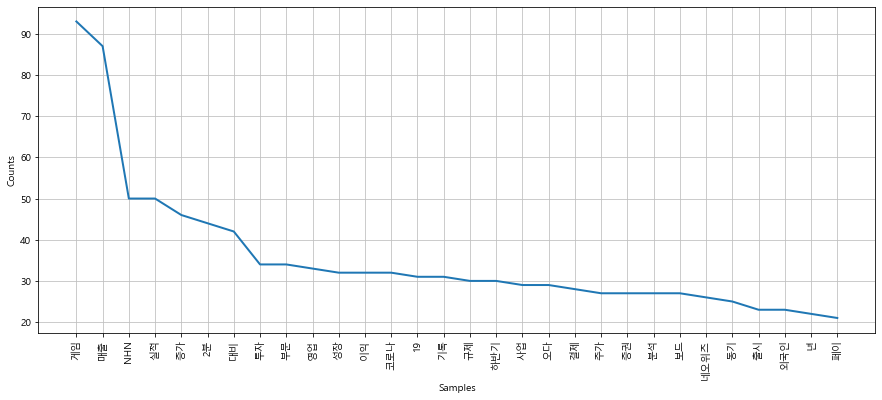

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#matplotlib.rc('font', family="NanumBarunGothic")

plt.figure(figsize=(15,6))
tok.plot(30)
plt.show()

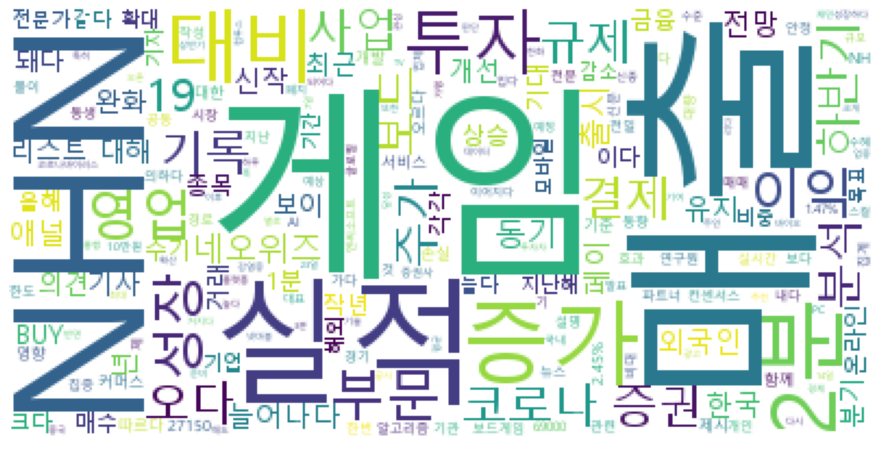

In [36]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.2, background_color='white').generate_from_frequencies(counts)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()